In [1]:
%matplotlib inline
import numpy as np
import pylab

## Image manipulation

In [2]:
import urllib
urllib.request.urlretrieve('https://cs.unc.edu/Courses/comp116-f17/media/fpb.jpg', filename='fpb.jpg')

('fpb.jpg', <http.client.HTTPMessage at 0x108c12ef0>)

In [3]:
fpb = pylab.imread('fpb.jpg')
print(fpb.shape)

(165, 305, 3)


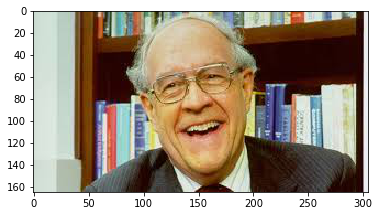

In [4]:
def show(im):
    pylab.imshow(im, cmap=pylab.gray(), interpolation='none')
    
show(fpb)

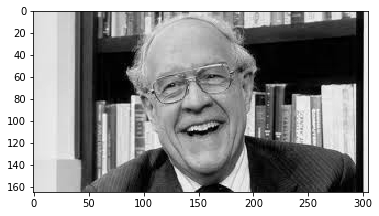

In [8]:
#manipulate color
show(fpb[:,:,1])
g=fpb[:,:,1]

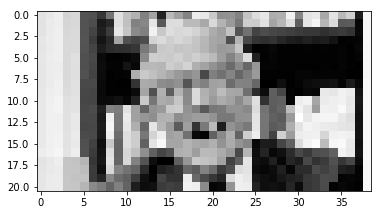

In [9]:
#reduced clarity
show(g[::8,::8])

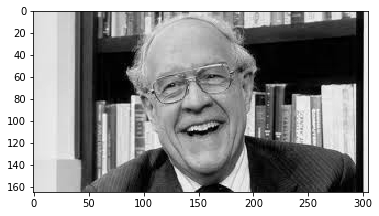

In [10]:
gs= g/np.max(g)
show(gs)

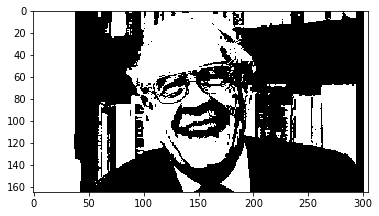

In [12]:
#shadows
gb=gs>0.55
show(gb)

## Fake up some Data

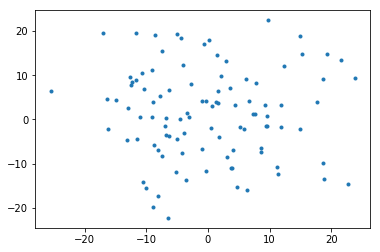

In [13]:
np.random.seed(0)

# we'll start with 2D points

coords = np.random.normal(0.0, 10, (100, 2)) 

# plot them to take a peek
pylab.plot(coords[:,0], coords[:,1], '.')

## count the pairs that have on point on the left half-plane and the other point on the right half-plane and the distance between the points is >=1 and <+5

In [15]:
pairs=[]
# visit every point
for i in range(len(coords)):
    # get points in the left half-plane
    if coords[i, 0] < 0:
        #visit every point
        for j in range(len(coords)):
            if coords[j,0]>0:
                #here I have a point in the left and a point on the right
                d= np.sqrt(np.sum((coords[i]-coords[j])**2))
                if d>= 1 and d<=5:
                    pairs.append((i,j))

print(pairs)

[(4, 15), (4, 28), (4, 49), (4, 71), (17, 28), (19, 13), (27, 7), (27, 15), (27, 28), (27, 47), (27, 49), (27, 71), (39, 13), (39, 28), (57, 71), (63, 48), (75, 5), (75, 48), (77, 9), (77, 13), (77, 32), (96, 9), (96, 60), (96, 69)]


## Date time

In [17]:
import datetime
start= datetime.date(2000,1,1)
end= datetime.date(2100,1,1)
diff= end-start
print(diff)

36525 days, 0:00:00


In [18]:
d=start
f13=[]
years= 100
end= datetime.date(start.year+years,1,1)
days=(end-start).days
for i in range(days):
    if d.day==13 and d.weekday()==4 and d.month==10:
        f13.append(d)
    d=d+datetime.timedelta(1)    
    
print(f13)

[datetime.date(2000, 10, 13), datetime.date(2006, 10, 13), datetime.date(2017, 10, 13), datetime.date(2023, 10, 13), datetime.date(2028, 10, 13), datetime.date(2034, 10, 13), datetime.date(2045, 10, 13), datetime.date(2051, 10, 13), datetime.date(2056, 10, 13), datetime.date(2062, 10, 13), datetime.date(2073, 10, 13), datetime.date(2079, 10, 13), datetime.date(2084, 10, 13), datetime.date(2090, 10, 13)]


In [20]:
## finding all the friday the thirteenths in october
def listfridaythe13th(start, years):
    d=start
    f13=[]
    years= 100
    end= datetime.date(start.year+years,1,1)
    days=(end-start).days
    onday=datetime.timedelta(1) 
    for i in range(days):
        if d.day==13 and d.weekday()==4 and d.month==10:
            f13.append(d)
        d=d+onday 
    return f13
listfridaythe13th(datetime.date(2000, 1, 1), 100)

[datetime.date(2000, 10, 13),
 datetime.date(2006, 10, 13),
 datetime.date(2017, 10, 13),
 datetime.date(2023, 10, 13),
 datetime.date(2028, 10, 13),
 datetime.date(2034, 10, 13),
 datetime.date(2045, 10, 13),
 datetime.date(2051, 10, 13),
 datetime.date(2056, 10, 13),
 datetime.date(2062, 10, 13),
 datetime.date(2073, 10, 13),
 datetime.date(2079, 10, 13),
 datetime.date(2084, 10, 13),
 datetime.date(2090, 10, 13)]

In [22]:
np.random.seed(0)
t= np.random.randint(30,100,20)
t

array([74, 77, 94, 97, 97, 39, 51, 66, 42, 88, 95, 69, 76, 67, 55, 39, 50,
       99, 77, 94])

In [25]:
# run
def runlength(P):
    result = []
    N = 0
    for v in (P):
        if v:
            N = N + 1
        else:
            N = 0
        result.append(N)
    return result
runlength(t>50)

[1, 2, 3, 4, 5, 0, 1, 2, 0, 1, 2, 3, 4, 5, 6, 0, 0, 1, 2, 3]

In [26]:
def maxrunlength(P):
    result = 0
    N = 0
    for i in range(len(P)):
        if P[i]:
            N = N + 1
        else:
            N = 0
        if N>result:
            result=N
    return result
maxrunlength(t>50) #longest run

6

In [27]:
def argmaxrunlength(P):
    result = 0
    N = 0
    maxi=0
    for i in range(len(P)):
        if P[i]:
            N = N + 1
        else:
            N = 0
        if N>result:
            result=N
            maxi=i
    return result, maxi
argmaxrunlength(t>50)# longest run and index

(6, 14)

In [28]:
np.random.seed(0)
A = np.random.randint(0, 100, (4, 5))
A

array([[44, 47, 64, 67, 67],
       [ 9, 83, 21, 36, 87],
       [70, 88, 88, 12, 58],
       [65, 39, 87, 46, 88]])

In [31]:
#lowercase letters
s='HannaH'
s.lower()

'hannah'

In [33]:
#replace
'abcdef'.replace('cd','dc')


'abdcef'

In [34]:
'a man'.replace(' ','')

'aman'

In [36]:
np.array('abcd')
a=np.array(list('abcd'))
a != 'b'

array([ True, False,  True,  True], dtype=bool)

In [37]:
a[a != 'b']

array(['a', 'c', 'd'], 
      dtype='<U1')

In [38]:
#join
''.join(a[a!='b'])

'acd'

In [39]:
#split
'hello,word'.split(',')

['hello', 'word']

In [40]:
dates = np.array([[2017, 10, 1], [2017, 10, 2], [2017, 10, 13], [2017, 10, 27.0]])
dates

array([[  2.01700000e+03,   1.00000000e+01,   1.00000000e+00],
       [  2.01700000e+03,   1.00000000e+01,   2.00000000e+00],
       [  2.01700000e+03,   1.00000000e+01,   1.30000000e+01],
       [  2.01700000e+03,   1.00000000e+01,   2.70000000e+01]])

In [41]:
from datetime import date
dow=[]
for i in range(len(dates)):
    d=date(int(dates[i,0]),int(dates[i,1]),int(dates[i,2]))
    dow.append(d.weekday())
dow=np.array(dow)
dow

array([6, 0, 4, 4])

##how to find p

h1,h2=delta((month==5)|(month==6)|(month==7),(month==12)|(month==1)|(month==2), survey[:,1])

d= h2-h1

N=1000

count=0

for i in range(N):

    m=np.random.permutation(month)
    
    h1,h2=delta((m==5)|(m==6)|(m==7),(m==12)|(m==1)|(m==2), survey[:,1])
    
    dp=h2-h1
    
    if dp>d:
    
        count=count+1
        
print("p=", count/N)


In [1]:
#to append to each column
def count(seq):
    result= []
    for n in range(1,7):
        result.append(np.count_nonzero(seq==n))
    return result
count(rolls)

NameError: name 'rolls' is not defined